170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/20
391/391 [==============================] - 116s 292ms/step - loss: 1.6040 - accuracy: 0.4088 - val_loss: 1.2325 - val_accuracy: 0.5569
Epoch 2/20
391/391 [==============================] - 109s 278ms/step - loss: 1.2041 - accuracy: 0.5720 - val_loss: 1.0210 - val_accuracy: 0.6399
Epoch 3/20
391/391 [==============================] - 109s 280ms/step - loss: 1.0434 - accuracy: 0.6334 - val_loss: 0.9322 - val_accuracy: 0.6776
Epoch 4/20
391/391 [==============================] - 109s 277ms/step - loss: 0.9272 - accuracy: 0.6765 - val_loss: 0.8891 - val_accuracy: 0.6900
Epoch 5/20
391/391 [==============================] - 110s 282ms/step - loss: 0.8366 - accuracy: 0.7081 - val_loss: 0.7919 - val_accuracy: 0.7257
Epoch 6/20
391/391 [==============================] - 105s 268ms/step - loss: 0.7749 - accuracy: 0.7303 - val_loss: 0.7851 - val_accuracy: 0.7302
Epoch 7/20
391/391 [==============================] - 112

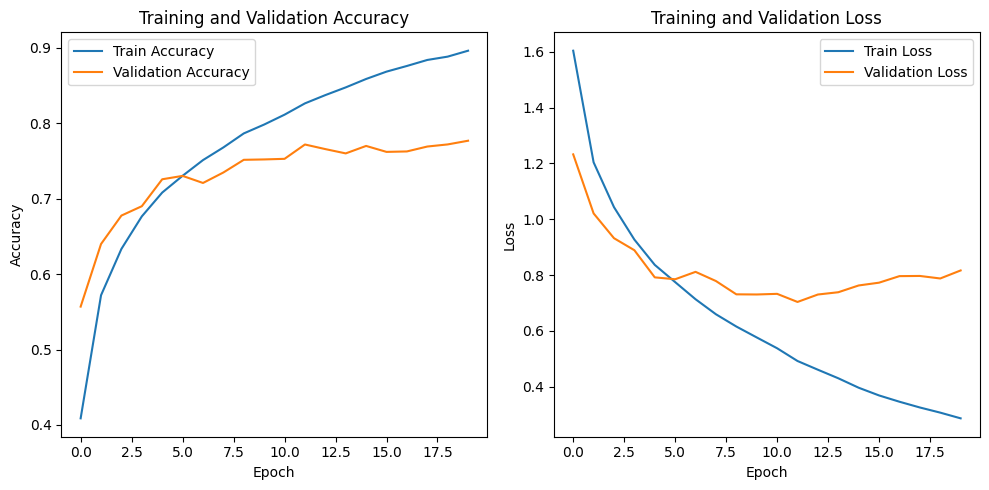

In [7]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
